# Работа с данными

In [273]:
import pandas as pd
import numpy as np

Расположение файлов

In [274]:
dataset_folder = './data_set/'

test_folder = 'test.csv'
train_folder = 'train.csv'

In [275]:
train_data = pd.read_csv(dataset_folder+train_folder)
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [276]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Обработаем датасет:

In [277]:
def edit_data(data : pd.DataFrame, columns: list, drop_columns = []) -> pd.DataFrame:
    
    for i_columns in columns:
        try:
            data = pd.concat([
            data.drop(i_columns, axis=1),
            pd.get_dummies(data[i_columns])
            ],axis=1)
        except:
            print('Error get_dummies: Not columns '+i_columns)
    for i_columns in drop_columns:
        try:
            data = data.drop(i_columns, axis=1)
        except:
            print('Error drop: Not columns '+i_columns)
    return data

In [278]:
edit_columns = ['HomePlanet', 'Destination']
drop_columns = ['PassengerId', 'Cabin', 'Name']
train_data = edit_data(train_data, edit_columns, drop_columns)

In [279]:
data_Transported = train_data['Transported']
train_data = train_data.drop('Transported', axis=1)

train_data.insert(len(train_data.columns), 'Transported', data_Transported)

In [280]:
train_data.T

,0,1,2,3,4,5,6,7,8,9,...,8683,8684,8685,8686,8687,8688,8689,8690,8691,8692
CryoSleep,False,False,False,False,False,False,False,True,False,True,...,False,True,False,False,NaN,False,True,False,False,False
Age,39.0,24.0,58.0,33.0,16.0,44.0,26.0,28.0,35.0,14.0,...,21.0,23.0,0.0,32.0,30.0,41.0,18.0,26.0,32.0,44.0
VIP,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
RoomService,0.0,109.0,43.0,0.0,303.0,0.0,42.0,0.0,0.0,0.0,...,86.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,126.0
FoodCourt,0.0,9.0,3576.0,1283.0,70.0,483.0,1539.0,0.0,785.0,0.0,...,3.0,0.0,0.0,1146.0,3208.0,6819.0,0.0,0.0,1049.0,4688.0
ShoppingMall,0.0,25.0,0.0,371.0,151.0,0.0,3.0,0.0,17.0,0.0,...,149.0,0.0,0.0,0.0,0.0,0.0,0.0,1872.0,0.0,0.0
Spa,0.0,549.0,6715.0,3329.0,565.0,291.0,0.0,0.0,216.0,0.0,...,208.0,0.0,0.0,50.0,2.0,1643.0,0.0,1.0,353.0,0.0
VRDeck,0.0,44.0,49.0,193.0,2.0,0.0,0.0,NaN,0.0,0.0,...,329.0,0.0,0.0,34.0,330.0,74.0,0.0,0.0,3235.0,12.0
Earth,False,True,False,False,True,True,True,True,True,False,...,True,False,False,False,False,False,True,True,False,False
Europa,True,False,True,True,False,False,False,False,False,True,...,False,False,True,True,True,True,False,False,True,True


Обработаем Nan:

In [281]:
#train_data.fillna(0, inplace=True)
train_data.fillna(train_data.mode().iloc[0], inplace=True)

C:\Users\Filic\AppData\Local\Temp\ipykernel_51508\787634764.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.fillna(train_data.mode().iloc[0], inplace=True)


Разабьём на data и lable

In [282]:
lable = train_data['Transported'].to_numpy().astype(np.int32)
data = train_data.drop('Transported', axis= 1).to_numpy().astype(np.float64)

Скалируем значения:

In [283]:
from sklearn.preprocessing import StandardScaler

In [284]:
data = StandardScaler().fit_transform(data)

In [285]:
data

array([[-0.73277002,  0.71555276, -0.15306307, ..., -0.51101319,
        -0.31748665,  0.68531265],
       [-0.73277002, -0.32940751, -0.15306307, ..., -0.51101319,
        -0.31748665,  0.68531265],
       [-0.73277002,  2.03916911,  6.53325471, ..., -0.51101319,
        -0.31748665,  0.68531265],
       ...,
       [-0.73277002, -0.19007947, -0.15306307, ..., -0.51101319,
        -0.31748665,  0.68531265],
       [-0.73277002,  0.22790464, -0.15306307, ...,  1.95689664,
        -0.31748665, -1.45918801],
       [-0.73277002,  1.06387285, -0.15306307, ..., -0.51101319,
        -0.31748665,  0.68531265]])

Разабьём выборку:

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
train_x, test_x, train_y, test_y = train_test_split(data, lable, test_size=0.125,shuffle=False)

# Выор и обучение модели

Выберем метод опрных векторов т.к. он будет эффективен для пространст больших размеров

In [288]:
from sklearn.svm import SVC

In [289]:
model = SVC(kernel='linear', C=1)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.781048758049678

In [290]:
model = SVC(kernel='sigmoid', C=1)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.7120515179392825

In [291]:
model = SVC(kernel='poly', C=1)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.7773689052437902

In [292]:
model = SVC(kernel='rbf', C=1, random_state=42)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.7911683532658693

In [293]:
from tqdm import tqdm
import matplotlib.pyplot as plt 

In [294]:
if False:
    C = list(range(1, 100, 5))
    score = []
    for i in (pbar:=tqdm(C)):
        model = SVC(kernel='rbf', C=i, random_state=42)
        model.fit(train_x, train_y)
        score_i = model.score(test_x, test_y)
        score.append(score_i)
        pbar.set_description(f"score '{score_i}'")
    plt.plot(C, score)
    plt.show()

In [295]:
model = SVC(kernel='rbf', C=15, random_state=42)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.796688132474701

In [327]:
from sklearn.ensemble import GradientBoostingClassifier

score '0.7838086476540939': 100%|██████████| 180/180 [11:24<00:00,  3.80s/it]


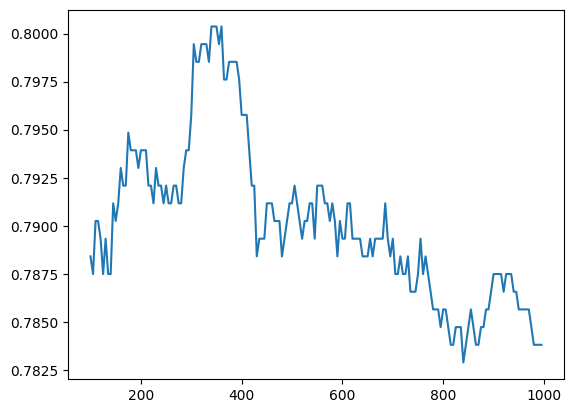

In [328]:
if True:
    C = list(range(100, 1000, 5))
    score = []
    for i in (pbar:=tqdm(C)):
        model = GradientBoostingClassifier(n_estimators=i, random_state=42)
        model.fit(train_x, train_y)
        score_i = model.score(test_x, test_y)
        score.append(score_i)
        pbar.set_description(f"score '{score_i}'")
    plt.plot(C, score)
    plt.show()

In [329]:
model = GradientBoostingClassifier(n_estimators=350, random_state=42)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.8003679852805887

Оценим модель по крос валидации:

In [330]:
from sklearn.model_selection import cross_val_score

In [331]:
cross_val_score(model, test_x, test_y, cv = 5)

array([0.77981651, 0.75688073, 0.79262673, 0.77880184, 0.74193548])

# Создадим файл для постинга

Обработаем входные данные:

In [332]:
test_data = pd.read_csv(dataset_folder+test_folder)

In [333]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [334]:
edit_columns = ['HomePlanet', 'Destination']
drop_columns = ['PassengerId', 'Cabin', 'Name']

PassengerId = pd.DataFrame(test_data['PassengerId'])
test_data = edit_data(test_data, edit_columns, drop_columns)

In [335]:
test_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,True,27.0,False,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,True
1,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,True,False,False,False,False,True
2,True,31.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,True,False,False
3,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,False,True,False,False,False,True
4,False,20.0,False,10.0,0.0,635.0,0.0,0.0,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,True,34.0,False,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,True
4273,False,42.0,False,0.0,847.0,17.0,10.0,144.0,True,False,False,False,False,True
4274,True,NaN,False,0.0,0.0,0.0,0.0,0.0,False,False,True,True,False,False
4275,False,NaN,False,0.0,2680.0,0.0,0.0,523.0,False,True,False,False,False,False


In [336]:
test_data.fillna(test_data.mode().iloc[0], inplace=True)

C:\Users\Filic\AppData\Local\Temp\ipykernel_51508\839111562.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.fillna(test_data.mode().iloc[0], inplace=True)


In [337]:
test_data = test_data.to_numpy().astype(np.float64)

In [338]:
test_data = StandardScaler().fit_transform(test_data)

In [339]:
PassengerId.shape

(4277, 1)

In [340]:
test_data.shape

(4277, 14)

Получим вывод из модели:

In [341]:
out = model.predict(test_data)

In [342]:
PassengerId.insert(len(PassengerId.columns), 'Transported', out)

In [343]:
PassengerId['Transported'] = PassengerId['Transported'].astype(bool)

Создадим файл:

In [344]:
PassengerId.to_csv('submission.csv', index=False)